<a href="https://colab.research.google.com/github/palettflower/dap-2024/blob/main/les07/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №7. Классификация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в виде файла rep.ipynb в ваш репозиторий github в директорию ./les07
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<7>  <12002209> <Алимова Полина Игоревна>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.
1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


## Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [ ]:
df=pd.read_csv("titanic.csv",index_col='PassengerId')
df



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


2. Выведете первые 7 строк набора.

In [ ]:
df.head(7)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?
    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [ ]:
df=df[["Survived","Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,NaN,1,2,23.4500


5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [ ]:
#df=pd.get_dummies(df, columns=['Sex']).astype('float64')
df[df['Fare']>5]


,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Age,Fare
PassengerId,,,,,,,,
259,1.0,1.0,0.0,0.0,1.0,0.0,0.365167,9.032109
680,1.0,1.0,0.0,1.0,0.0,1.0,0.434055,9.032109
738,1.0,1.0,0.0,0.0,0.0,1.0,0.365167,9.032109


6. Удалите строки, которые содержать хотя бы одно null значение.

In [ ]:
df.isnull().sum()
df=df[df['Age'].notnull()]

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_female,0
Sex_male,0


## Исследование данных

4. Нормализуйте значения признака "Fare".

In [ ]:
df_fare_age=df[['Age','Fare']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_fare_age)
df_fare_age=pd.DataFrame(scaled_data, columns=["Age","Fare"], index=df.index)
df=df[['Survived','Pclass','SibSp','Parch','Sex_female','Sex_male']].join(df_fare_age)
df.describe()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Age,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,7.140000e+02
mean,0.406162,2.236695,0.512605,0.431373,0.365546,0.634454,0.000000,2.487895e-18
std,0.491460,0.838250,0.929783,0.853289,0.481921,0.481921,1.000701,1.000701e+00
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-2.016979,-6.560759e-01
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.659542,-5.038498e-01
50%,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,-0.117049,-3.583992e-01
75%,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.571831,-2.495211e-02
max,1.000000,3.000000,5.000000,6.000000,1.000000,1.000000,3.465126,9.032109e+00


5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [ ]:
df.pivot_table('Fare', columns='Survived', aggfunc='mean')

Survived,0.0,1.0
Fare,-0.221797,0.324283


6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

9.03210855381962

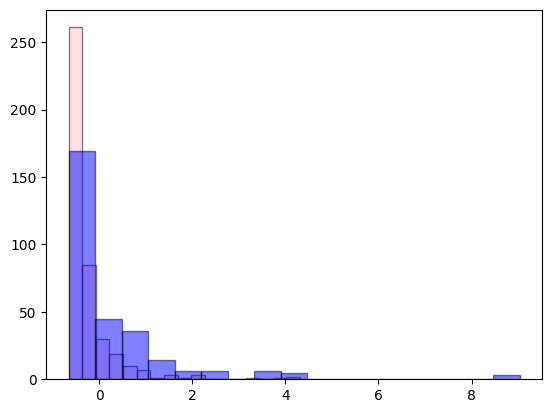

In [ ]:
bins = 17
plt.hist(df[df['Survived']==0]['Fare'], bins=bins, edgecolor='black', alpha=0.5, color='pink')
plt.hist(df[df['Survived']==1]['Fare'], bins=bins, edgecolor='black', alpha=0.5, color='blue')
df['Fare'].max()

7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [ ]:
X=df[['Pclass','SibSp','Parch','Sex_female','Sex_male','Fare','Age']]
y=df['Survived']

## Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(X,y,train_size=0.25, random_state=42)

9. Выполните обучение модели.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4, algorithm='auto')

model.fit(X_train,y_train)
y_pred = model.predict(X_test) #предсказанные данные

## Проверка модели

10. Выведите мартицу ошибок

In [ ]:
from sklearn.metrics import confusion_matrix
model_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,272,46
1,62,156


11. Расчитайте accuracy

In [ ]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
round(model_accuracy,2)

0.8

12. Сделайте вывод о полученном результате

Вывод:

## Вопросы для защиты

1. Сформулируйте задачу классификации.
2. Перечислите типы классификации.
3. В чем особенность несбалансированной классификации?
4. В чем особенность мультиклассовой классификации?
5. В чем особенность бинарной классификации?
6. В чем особенность классификации по нескольким меткам?
7. Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?
8. Что такое матрица ошибок (несоответствий)?
9. Как рассчитывается Accuracy?
10. Объясните алгоритм классификации K-ближайших соседей.